## Required Packages

In [1]:
import ee
import geemap
import rasterio
import numpy as np
import matplotlib.pyplot as plt


## Authenticaion and Initialization

In [ ]:
# Authenticaion and Initialization
ee.Authenticate()
ee.Initialize(project="ee-leolincoln9804")

In [45]:
# Define the Geological Range and Time Window
coords = ee.Geometry.Rectangle([-74.01, 40.75, -73.86, 40.88])
time_window = ee.DateRange("2021-06-01", "2021-09-01")

# Collection
collection = "MODIS/061/MCD19A2_GRANULES"


## Data Retrieval

In [ ]:
dataset = ee.ImageCollection(collection) \
    .filterDate(time_window) \
    .filterBounds(coords) \
    .mean() \

bands_names = [
    "Optical_Depth_047",
    "Optical_Depth_055",
    "AOD_Uncertainty",
    "FineModeFraction",
    "Column_WV",
    "Injection_Height",
    "AOD_QA",
    "AngstromExp_470-780",
    "cosSZA",
    "cosVZA",
    "RelAZ",
    "Scattering_Angle",
    "Glint_Angle"
]

aod = dataset.select(bands_names)

aod.bandNames().getInfo()

['Optical_Depth_047',
 'Optical_Depth_055',
 'AOD_Uncertainty',
 'FineModeFraction',
 'Column_WV',
 'Injection_Height',
 'AOD_QA',
 'AngstromExp_470-780',
 'cosSZA',
 'cosVZA',
 'RelAZ',
 'Scattering_Angle',
 'Glint_Angle']

In [63]:
SAVE_DIR = "../data/air_quality/"

output_file = "AOD_NewYork_Summer2021.tif"
geemap.ee_export_image(
    aod, 
    filename=SAVE_DIR+output_file, 
    scale=1000, 
    region=coords, 
    file_per_band=False
)

Generating URL ...
Please wait ...
Data downloaded to d:\HW & Project\EY Challenge\ey_challenge\data_pipeline\data\air_quality\AOD_NewYork_Summer2021.tif


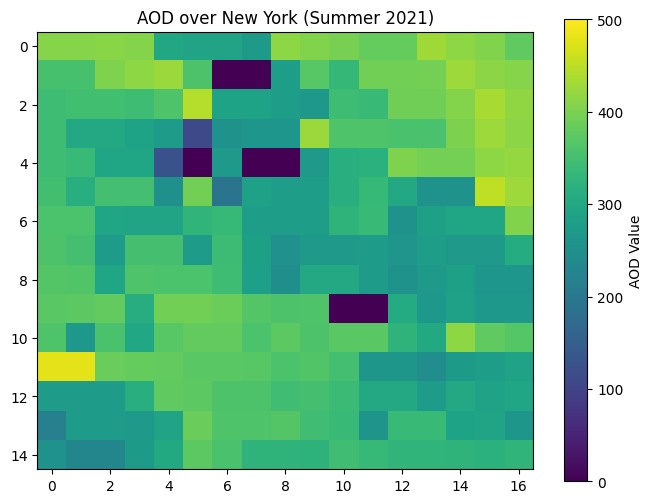

array([[408.67391304, 408.67391304, 411.35416667, 408.02040816,
        297.02439024, 291.39534884, 291.39534884, 273.15384615,
        415.25641026, 406.02380952, 397.74468085, 381.94444444,
        381.94444444, 428.61538462, 414.30188679, 405.5       ,
        377.50909091],
       [354.5       , 354.5       , 403.64      , 415.2244898 ,
        425.5       , 360.57142857,   0.        ,   0.        ,
        279.41666667, 370.45238095, 332.64444444, 392.98148148,
        392.98148148, 394.79245283, 427.55319149, 413.58      ,
        408.31481481],
       [345.23913043, 349.21276596, 349.21276596, 345.20930233,
        362.91304348, 445.3       , 289.78787879, 289.78787879,
        278.90625   , 265.91891892, 345.04651163, 337.36734694,
        390.83673469, 390.83673469, 408.02      , 435.26      ,
        416.25454545],
       [344.4893617 , 301.81818182, 301.81818182, 289.525     ,
        275.08108108, 109.4       , 255.46666667, 262.75862069,
        262.75862069, 425.38095238,

In [65]:
# tif. file path
tif_file = "..\\data\\air_quality\AOD_NewYork_Summer2021.tif"

# Open tif. file
with rasterio.open(tif_file) as src:
    aod_data = src.read(1)  # Đọc band đầu tiên
    profile = src.profile  # Metadata của file


# print("Metadata")
# for key, value in profile.items():
#     print(f"{key}: {value}")



plt.figure(figsize=(8, 6))
plt.imshow(aod_data, cmap="viridis", interpolation="nearest", vmax=500)
plt.colorbar(label="AOD Value")
plt.title("AOD over New York (Summer 2021)")
plt.show()

aod_data